# **Pràctica 1: Regressió**

# Apartat (C): Analitzant les dades

L'objectiu d'aquest primer apartat és conèixer la base de dades amb la que treballarem. Anaitzarem els diferents atributs que la composen, els entendrem i, si no està estipulat, fixarrem quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades.

In [1]:
# importem alguens llibreries que necessitarem.
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import warnings
warnings.filterwarnings("ignore")


# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem els nostres datasets
days_dataset = load_dataset('day.csv') # dataset abans
days = days_dataset.values # data abans
hours_dataset = load_dataset('hour.csv')
hours = hours_dataset.values

Algunes bases de dades tenen valors no existents. Numpy els representa amb ``np.nan``. Per treure'ls es pot utilitzar ``dades[np.isnan(dades)] = valor``. El ``valor`` d'aquest pot ser 0, la mitja, la mediana, ... i es pot mirar com afecten diferents estratègies. A més, també podem mirar si hi ha algun atribut perdut, és a dir, que té molts valors no existents i valorar si eliminar directament l'atribut.

Primer de tot comptarem el nombre de valors no existents per atribut:

In [2]:
print('Valors no existents days.csv:')
print(days_dataset.isnull().sum(),'\n')
print('Valors no existents hours.csv:')
print(hours_dataset.isnull().sum())

Valors no existents days.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

Valors no existents hours.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Sembla que en el nostre dataset no trobem cap valor no existent per tant no hem de fer res.

Observem les primeres mostres de la nostra base de dades:

In [3]:
print('5 primeres mostres de days_dataset:')
days_dataset.head()

5 primeres mostres de days_dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [4]:
print('5 primeres mostres de hours_dataset:')
hours_dataset.head()

5 primeres mostres de hours_dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240,0.288,0.810,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220,0.273,0.800,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220,0.273,0.800,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240,0.288,0.750,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240,0.288,0.750,0.000,0,1,1


Ara veurem estadístique sdels atributs numèrics de les bases de dades:

In [5]:
print("Estadístiques dels atributs numèrics de days_dataset:")
days_dataset.describe()

Estadístiques dels atributs numèrics de days_dataset:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,366.000,2.497,0.501,6.520,0.029,2.997,0.684,1.395,0.495,0.474,0.628,0.190,848.176,3656.172,4504.349
std,211.166,1.111,0.500,3.452,0.167,2.005,0.465,0.545,0.183,0.163,0.142,0.077,686.622,1560.256,1937.211
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.059,0.079,0.000,0.022,2.000,20.000,22.000
25%,183.500,2.000,0.000,4.000,0.000,1.000,0.000,1.000,0.337,0.338,0.520,0.135,315.500,2497.000,3152.000
50%,366.000,3.000,1.000,7.000,0.000,3.000,1.000,1.000,0.498,0.487,0.627,0.181,713.000,3662.000,4548.000
75%,548.500,3.000,1.000,10.000,0.000,5.000,1.000,2.000,0.655,0.609,0.730,0.233,1096.000,4776.500,5956.000
max,731.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,0.862,0.841,0.973,0.507,3410.000,6946.000,8714.000


In [6]:
print("Estadístiques dels atributs numèrics de hours_dataset:")
hours_dataset.describe()

Estadístiques dels atributs numèrics de hours_dataset:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


#### **Estudi i neteja d'atributs no utilitzats**
Hi ha alguns atributs redundants com 'casual' i 'registered' ja que no ens ajudaran a modelitzar la demanda del comportoment d'un únic usuari. També per no tenir problemes amb el tipus de les dades, farem servir 'instant' en comptes de 'dteday' per representar el pas dels dies en ``days_dataset``. 

A més decidim que el nostre atribut objectiu serà 'cnt', el nombre total de bicis llogades.

In [7]:
# data days
x_days = days[:, :13] 
x_days = np.delete(x_days,1,1)
x_days = x_days.astype(np.float)

# data hours
x_hours = hours[:, :14] 
x_hours = np.delete(x_hours,1,1)
x_hours = x_hours.astype(np.float)

# target days
y_days = days[:,15] # cnt
y_days = y_days.astype(np.float)

# target hours
y_hours = hours[:,16] # cnt
y_hours = y_hours.astype(np.float)

print('Dimensions days_dataset:')
print("Dimensionalitat de la BBDD:", days_dataset.shape)
print("Dimensionalitat de les entrades X", x_days.shape)
print("Dimensionalitat de l'atribut Y", y_days.shape)

print('\nDimensions hours_dataset:')
print("Dimensionalitat de la BBDD:", hours_dataset.shape)
print("Dimensionalitat de les entrades X", x_hours.shape)
print("Dimensionalitat de l'atribut Y", y_hours.shape)

Dimensions days_dataset:
Dimensionalitat de la BBDD: (731, 16)
Dimensionalitat de les entrades X (731, 12)
Dimensionalitat de l'atribut Y (731,)

Dimensions hours_dataset:
Dimensionalitat de la BBDD: (17379, 17)
Dimensionalitat de les entrades X (17379, 13)
Dimensionalitat de l'atribut Y (17379,)


Del dataset de les hores creiem que el que és important és observar a quines hores hi ha els pics de bicis llogades.

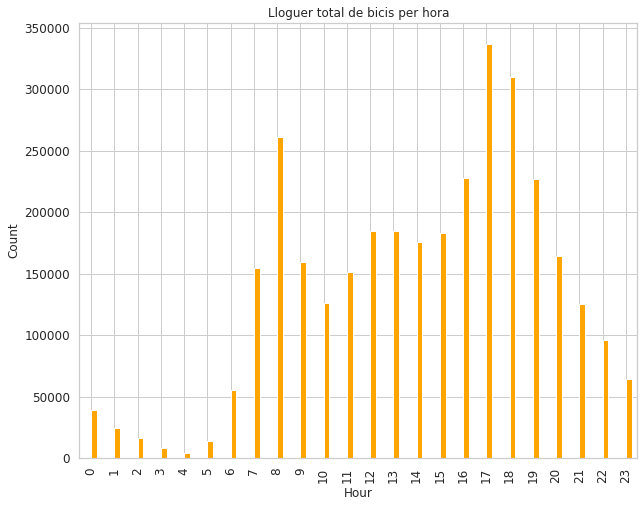

In [8]:
df_hours = pd.DataFrame(hours_dataset)
ax = df_hours[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer total de bicis per hora", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

Podem observar que pel matí, a les 8h hi ha bastants usuaris, i per la tarda, de les 16h a les 19h també hi haurà bastants lloguers de bicis. A les 17-18h, és quan hi ha més demanda. És a dir, els pics a les hores de viatge al treball i passejades per la tarda mostren que són hores de bicicleta populars.

Veurem ara en quines temporades i condicions meteorològiques tenen més lloguers:

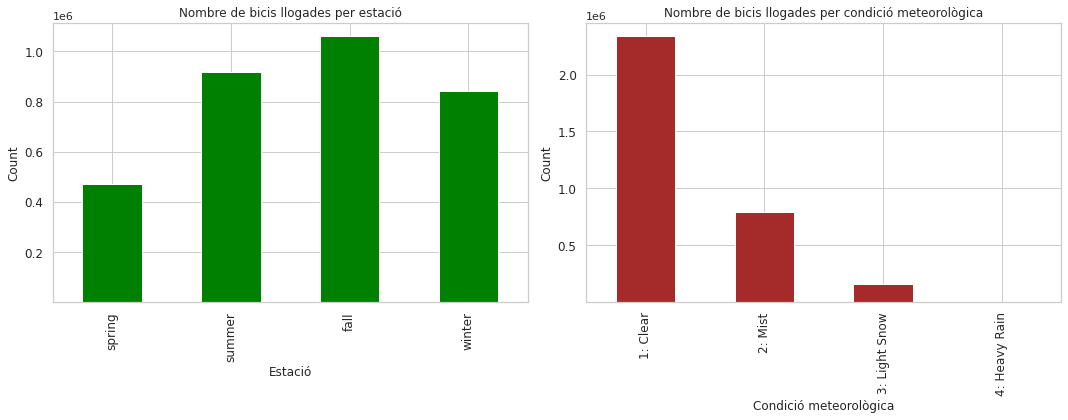

In [9]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = df_hours[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
        legend = False, title ="Nombre de bicis llogades per estació", 
        stacked=True, color = 'green', fontsize=12, ax=ax1)
ax1.set_xlabel("Estació", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','summer','fall','winter'])

 
ax2 = df_hours[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
        legend = False, stacked=True, title ="Nombre de bicis llogades per condició meteorològica", 
        color = 'brown', fontsize=12, ax=ax2)
ax2.set_xlabel("Condició meteorològica", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

Aquests gràfics mostren que la tardor és la estacio on més gent lloga bicicletes, i que la condició meteorològica preferida per llogar és un temps clar.

#### Visualitzacions de les relacions entre atributs
A partir d'ara utilitzarem ``days_dataset`` ja que ``hours_dataset`` tindrà molts valors prop del 0 degut a que hi ha hores, tal i com podem veure a al gràfic del lloguer total per hores, on la majoria de la gent està descançant/dormint. Amb ``hours_dataset`` veuriem molts valors baixos que ens poden confondre.

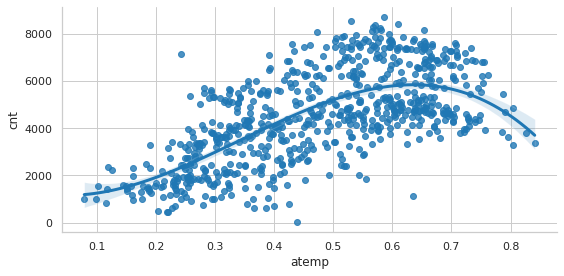

In [10]:
#Visualization of the relations between atemp and cnt

sns.lmplot("atemp", "cnt", days_dataset, order = 3, size = 4, aspect = 2)
plt.show()

Observem que quan la sensació tèrmica augmenta, el número de bicis llogades va augmentant fins a cert punt on comença a disminuir. Podem deduir que amb temperatures baixes o molt elevades tindrem menys bicis llogades.

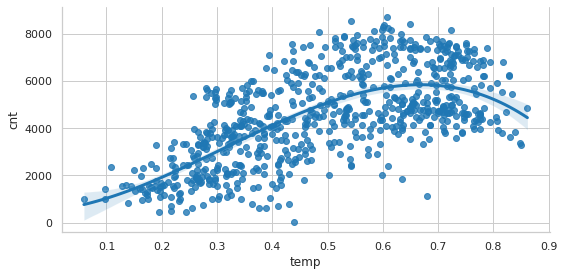

In [11]:
#Visualization of the relations between temp and cnt

sns.lmplot("temp", "cnt", days_dataset, order = 3, height = 4, aspect = 2)
plt.show()

Es molt semblant a la de la sensacío tèrmica ja que la temperatura i aquesta estan relacionades.
Si creesim un model per aquests podriem esperar trobar-nos una recta amb pendent positiu.
També esperem per tant una correlació positiva i alta. Comprovem-ho.

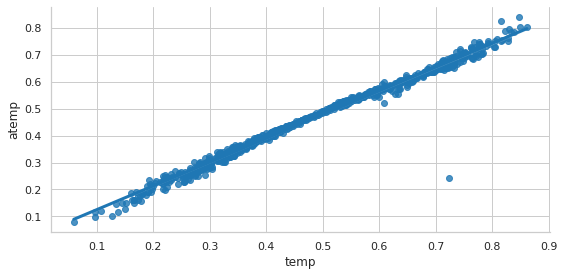

In [12]:
sns.lmplot("temp", "atemp", days_dataset, height = 4, aspect = 2)
plt.show()

Ara veurem la visualització del 'dteday' en days_dataset.

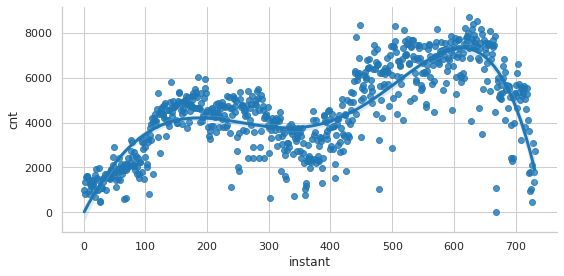

In [13]:
#Visualization of the relations between dteday and cnt

sns.lmplot("instant", "cnt", days_dataset, order = 5, height = 4, aspect = 2)
plt.show()

Podem observer que hi ha certa repetició a partir de l'insant 360, això és degut a que acaba l'any i les condicions haurien de ser semblants a l'inici. Veiem que la repetició és troba algo més a munt, això indica que l'empresa té més usuaris que l'any anterior, per tant van per bon camí.

El següent gràfic és un histograma de l'atribut 'cnt' per ``hours_dataset``:

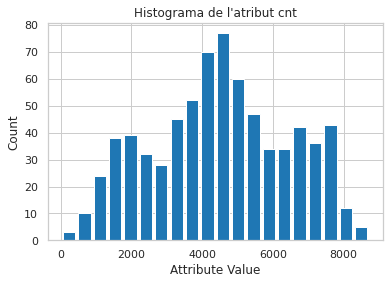

In [14]:
plt.figure()
plt.title("Histograma de l'atribut cnt")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y_days, bins=20, range=[np.min(y_days), np.max(y_days)], histtype="bar", rwidth=0.8)

Sembla una distribució gaussiana.

Etudiem a continuació la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells.

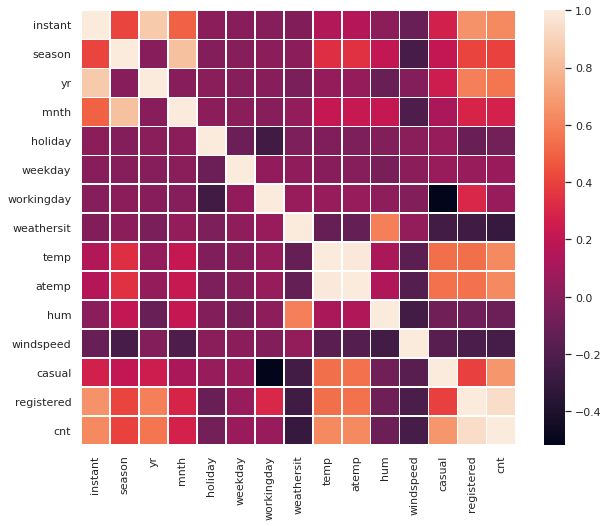

In [15]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = days_dataset.corr()

plt.figure(figsize = (10,8))

ax = sns.heatmap(correlacio, square=True, linewidths=0.5)

Com hem suposat abans temp i atemp tenen una correlació molt alta, gairebé 1.

Ara definirem un nou dataframe amb només els atributs quantitatius i importants.

In [16]:
feature_names = days_dataset.keys()
indexes = [0, 9, 10, 11, 12, 15]
df2 = pd.DataFrame(days[:,indexes], columns = feature_names[indexes])

També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si.

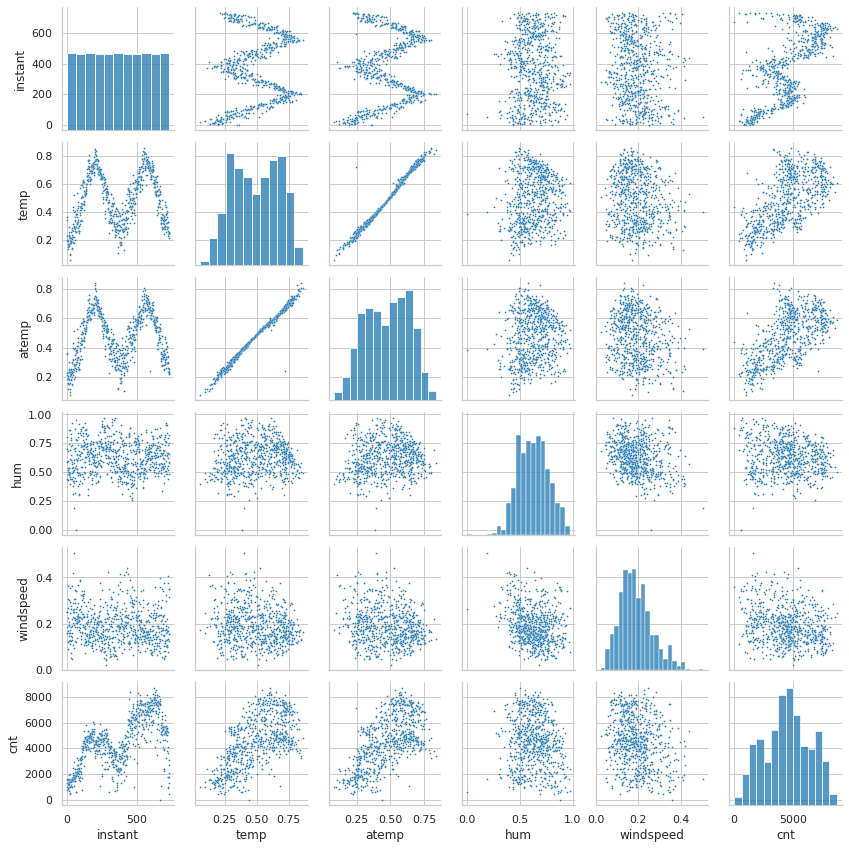

In [17]:
relacio = sns.pairplot(df2, height=2, aspect=1, plot_kws={"s": 3})

ixí doncs ara podreu respondre a les següents preguntes:

**1. Quin és el tipus de cada atribut?**

**2. Quins atributs tenen una distribució Guassiana?**

Els atributs 'temp' i 'atemp' són els més propers a tenir una forma gaussiana.

**3. Quin és l'atribut objectiu? Per què?**

Com hem dit abans 'cnt' és l'atribut objectiu.

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après. Per a això, caldrà analitzar la mitja i variança de cada variable per totes les mostres, per identificar aquells valors que tenen una distribució normal, els preferits per fer regressió, i descartar altres atributs que no són representatius per fer la regressió, i que afegeixen soroll al model. 

Pel que fa a l'error resultant de la regressió, es pot calcular fent la diferència entre el valor predit i el real al quadrat: així doncs, si les dades tenen valors grans (tipus 10^3), l'error al quadrat podria acabar sent 10^6. Per això és important normalitzar abans (escalar les dades a un rang més petit).

Per estandarditzar les dades amb les funcions mean i std de numpy podem fer servir la següent funció:

In [18]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

Nem a definir les noves dades normalitzades:

In [19]:
days_t = days
days_t = np.c_[x_days, y_days]

days_t = standarize(days_t)

x_days_t = days_t[:,:12]
y_days_t = days_t[:,12]

In [20]:
"""d'aqui"""

"d'aqui"

Ara aprendrem un model regressor tenint en compte tots aquells atributs que tenen una millor distribució de valors i calcularem l'error assolit en la predicció.

Per a la regressió podeu utilitzar la llibreria sklearn:

In [21]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Per calcular el mse:

In [22]:
# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

Ara que hem carregat les dades podem entrenar un regressor lineal per a aproximar la funció que les genera:

Mean squeared error:  0.6045724887544274
R2 score:  0.3954275112455726


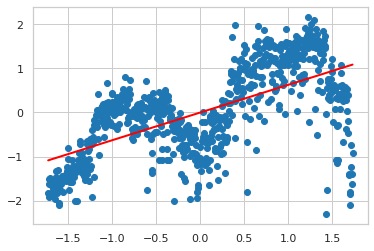

In [23]:
from sklearn.metrics import r2_score

atribut1 = x_days_t[:,0].reshape(x_days_t.shape[0], 1)

regr = regression(atribut1, y_days_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x_days_t[:,0], y_days_t)
plt.plot(atribut1, predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y_days_t, predicted)
r2 = r2_score(y_days_t, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


Sabent això ara podem avaluar de manera independent la idonietat de cadascun dels atributs.

Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.

In [24]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x_days_t, y_days_t)

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_tr, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en  %s: %f" %(feature_names[i], error))
    print("R2 score en %s: %f" %(feature_names[i], r2))

Error en  instant: 0.696489
R2 score en instant: 0.387824
Error en  dteday: 0.864220
R2 score en dteday: 0.240397
Error en  season: 0.762353
R2 score en season: 0.329933
Error en  yr: 1.021183
R2 score en yr: 0.102435
Error en  mnth: 1.125682
R2 score en mnth: 0.010587
Error en  holiday: 1.143124
R2 score en holiday: -0.004745
Error en  weekday: 1.128347
R2 score en weekday: 0.008244
Error en  workingday: 1.066570
R2 score en workingday: 0.062543
Error en  weathersit: 0.667697
R2 score en weathersit: 0.413130
Error en  temp: 0.656576
R2 score en temp: 0.422905
Error en  atemp: 1.147244
R2 score en atemp: -0.008366
Error en  hum: 1.035011
R2 score en hum: 0.090281


In [25]:
""" fins aqui no se si deixaro"""

' fins aqui no se si deixaro'

Anem a crear el nostre regressor d'una altre manera:

In [26]:
from sklearn import linear_model

# Dividim dades d'entrenament
x_train, y_train, x_test, y_test = split_data(x_days_t, y_days_t)

print ('Training and testing set sizes', x_train.shape, x_test.shape)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train) 
print ('\nCoefs (per dim) ', regr.coef_, ' and intercept: ', regr.intercept_)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regr.score(x_train, y_train) )
print ('Testing Score:', regr.score(x_test, y_test) )
print ('\nTraining MSE: ', np.mean((regr.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr.predict(x_test) - y_test)**2))

Training and testing set sizes (584, 12) (147, 12)

Coefs (per dim)  [-0.7600428   0.27933947  1.20784445  0.31736382 -0.02213557  0.07713052
  0.04432372 -0.18448533  0.22146967  0.25402575 -0.05484154 -0.10532396]  and intercept:  0.007231087725657502

Training Score: 0.8001040112011913
Testing Score: 0.7988012867751549

Training MSE:  0.20291949783592333
Testing MSE:  0.18798220515415395


### sparse model

Fem el mateix amb un regressor Lasso per intentar si podem millorar el model.

In [27]:
# Create a Lasso regressor
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(x_train, y_train) 
print ('Coeffs (per dim): ', regr_lasso.coef_, 'and intercept:', regr_lasso.intercept_)
#print (feature_names)
# Are the coeficients now sparse?
print ('\nTraining Score:', regr_lasso.score(x_train, y_train)) 
print ('Testing Score:', regr_lasso.score(x_test, y_test)) 
# Is the score almost the same? 0.999999999998
print ('\nTraining MSE: ', np.mean((regr_lasso.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_lasso.predict(x_test) - y_test)**2))

Coeffs (per dim):  [ 0.23549368  0.          0.08231875  0.         -0.          0.
  0.         -0.          0.          0.27481188 -0.         -0.        ] and intercept: 0.008451178408350407

Training Score: 0.5388037460304487
Testing Score: 0.5587768550743513

Training MSE:  0.46817203697620197
Testing MSE:  0.4122397127633925


Sembla que no hem millorat amb el regressor Lasso. Anem a veure l'error que obtindriem si utilitzessim les dades sense noramlitzar:

In [28]:
from sklearn import linear_model

# Dividim dades d'entrenament
x_train, y_train, x_test, y_test = split_data(x_hours, y_hours)

print ('Training and testing set sizes', x_train.shape, x_test.shape)
regr_no_t = linear_model.LinearRegression()
regr_no_t.fit(x_train, y_train) 
print ('\nCoefs (per dim) ', regr_no_t.coef_, ' and intercept: ', regr_no_t.intercept_)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regr_no_t.score(x_train, y_train) )
print ('Testing Score:', regr_no_t.score(x_test, y_test) )
print ('\nTraining MSE: ', np.mean((regr_no_t.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_no_t.predict(x_test) - y_test)**2))

Training and testing set sizes (13903, 13) (3476, 13)

Coefs (per dim)  [-8.52502475e-03  2.02088444e+01  1.57761794e+02  6.08572863e+00
  7.73529558e+00 -2.36633255e+01  2.08612037e+00  3.74603688e+00
 -3.45499893e+00  6.51962435e+01  2.47803015e+02 -1.94745069e+02
  3.78400284e+01]  and intercept:  -33.73359250735808

Training Score: 0.3907248407373679
Testing Score: 0.38089652545794983

Training MSE:  20147.654396783357
Testing MSE:  19950.498766886183


Observem que els errors són molt grans.

Anem a veure altra informacío que treiem:

In [29]:
print (x_days.shape)
print (y_days.shape)
df_feature_names = feature_names.delete([1,13,14,15])
print (list(df_feature_names))
print ("max, min and mean:", np.max(y_days), np.min(y_days), np.mean(y_days))

(731, 12)
(731,)
['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
max, min and mean: 8714.0 22.0 4504.3488372093025


Amb els coeficients obtinguts de la primera prova que hem fet, segons la importància dels atributs podem separar els que no utilitzariem i els més importants.

In [30]:
ind = np.argsort(np.abs(regr.coef_))
print ('Odre de les variables (de menys a més important segons el primer regressor):', list(df_feature_names[ind]))

Odre de les variables (de menys a més important segons el primer regressor): ['holiday', 'workingday', 'hum', 'weekday', 'windspeed', 'weathersit', 'temp', 'atemp', 'season', 'mnth', 'instant', 'yr']


In [31]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print ('Odre de les variables (de menys a més important segons el regressor lasso):', list(df_feature_names[ind]))

Odre de les variables (de menys a més important segons el regressor lasso): ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'yr', 'instant', 'atemp']


Podem seleccionar els atributs més importants amb sklearn:

In [32]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(x_train, y_train)
print ('Atributs seleccionats (T/F):', selector.get_support(), '\nAtributs seleccionats  (Name):', list(df_feature_names)) # Show the selected features

Atributs seleccionats (T/F): [ True False False False  True False False False False  True  True  True
 False] 
Atributs seleccionats  (Name): ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


Anem a avaluar les prediccions:

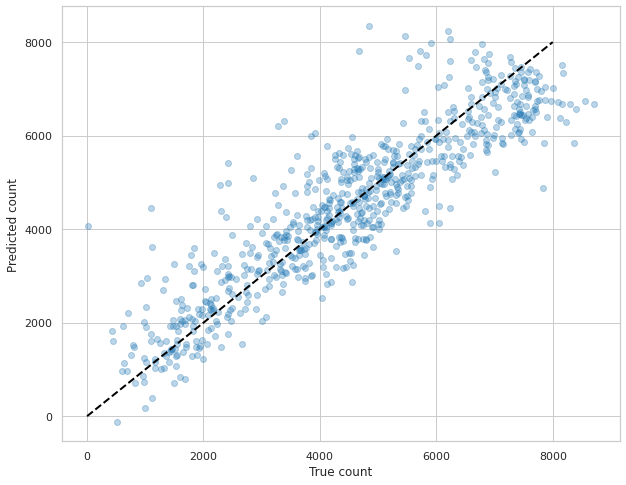

In [33]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(x_days, y_days)
predicted = clf.predict(x_days)
plt.figure(figsize = (10,8))
plt.scatter(y_days, predicted, alpha = 0.3)
plt.plot([0, 8000], [0, 8000], '--k')
plt.axis('tight')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

Avaluació del model:

In [34]:
clf.score(x_days, y_days)  # Best possible score is 1.0, lower values are worse.

0.8015701493093209

No és un model perfecte però tampoc dolent.

In [35]:
# Score using a single feature
regr_feat1 = linear_model.LinearRegression()
for i in np.arange(12):
    feat1 = x_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print ('Feature:', df_feature_names[i])
    print ('Score:', regr_feat1.score(feat1, y_train)) 

Feature: instant
Score: 0.08131533512274325
Feature: season
Score: 0.033252016958132846
Feature: yr
Score: 0.06688742701556971
Feature: mnth
Score: 0.015173706231793593
Feature: holiday
Score: 0.15358534880631058
Feature: weekday
Score: 0.001327663690562031
Feature: workingday
Score: 0.0009419498725561359
Feature: weathersit
Score: 0.0010702313549791898
Feature: temp
Score: 0.01956859078281714
Feature: atemp
Score: 0.16439584528017548
Feature: hum
Score: 0.1614681848806795
Feature: windspeed
Score: 0.10241384069317483


Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?


# Apartat (A): El descens del gradient  

En aquest apartat, ens centrarem en implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

$J$ retorna el `mse`. Per a trobar $w_j$, repetirem fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabem quin resultat hauríeu d'obtenir. O no, perquè la nostra implementació podria ser millor! 

In [36]:
# Definim la funció per fer la regressió amb el descent del gradient
def gradientDescent(x,y,theta,alpha,m,numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

In [37]:
# Definim les variables que utilitzarem per la regressió
m, n = np.shape(x_days)
numIterations = 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x_days_t,y_days_t,theta,alpha,m,numIterations)

Odre de les variables (de menys a més important) segons el **primer regressor**:

In [38]:
ind = np.argsort(np.abs(regr.coef_))
print (list(df_feature_names[ind]))

['holiday', 'workingday', 'hum', 'weekday', 'windspeed', 'weathersit', 'temp', 'atemp', 'season', 'mnth', 'instant', 'yr']


Odre de les variables (de menys a més important) segons el **descens de gradient**:

In [39]:
ind2 = np.argsort(np.abs(theta))
print (list(df_feature_names[ind2]))

['instant', 'workingday', 'holiday', 'mnth', 'weekday', 'hum', 'windspeed', 'weathersit', 'temp', 'atemp', 'season', 'yr']


Els atributs estan ordenats amb un pes similar excpete 'instant', en el primer regressor lineal que hem fet, és el segon atribut més important mentre que, en el regressor amb el descens del gradient, el menys important.

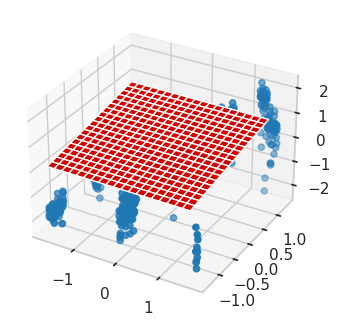

In [61]:
# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = x_days_t
y_val = y_days_t
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
#w = np.linalg.lstsq(A,predX3D)[0]
w = theta

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)
plt.show()

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
